In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV


# Load the CSV files into DataFrames
df_1 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/test.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/train.csv')
df_1.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [2]:
df_1.shape

(25976, 25)

In [3]:
df_2.shape

(103904, 25)

In [6]:
#Concatenate DataFrames
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df.shape

(129880, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [9]:
# Check for any null values in the DataFrame
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes     

In [10]:
 # Remove rows with missing values
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
print(df.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [11]:
# Identify duplicates in dataframe
duplicates = df.duplicated()
duplicates_number = duplicates.sum()
duplicates_number

0

In [12]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

Unnamed: 0                           103656
id                                   129487
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [13]:
# Preprocess: Drop columns not useful for prediction
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [14]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [16]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [17]:
# encode categorical variables
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_columns)
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,satisfied,True,False,True,False,True,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,satisfied,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,neutral or dissatisfied,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,satisfied,False,True,True,False,True,False,True,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,satisfied,True,False,True,False,True,False,False,True,False


In [18]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

In [19]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,1,True,False,True,False,True,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,1,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,1,False,True,True,False,True,False,True,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,1,True,False,True,False,True,False,False,True,False


In [22]:
# Define Features and Target Variable
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [23]:
features = X.columns
print("Features:")
print(features)


Features:
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')


In [51]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
#Train and Compare Multiple Classifier Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
report_rf = classification_report(y_test, rf_y_pred)

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}\n")



Random Forest Classifier
Accuracy: 0.9635493088269365
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.97      0.94      0.96     11442

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898




In [27]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_y_pred)
report_lr = classification_report(y_test, lr_y_pred)


print("Logistic Regression")
print(f"Accuracy: {accuracy_lr}")
print(f"Classification Report:\n{report_lr}\n")

Logistic Regression
Accuracy: 0.8718433855896208
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14456
           1       0.87      0.83      0.85     11442

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898




In [43]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, svc_y_pred)
report_svc = classification_report(y_test, svc_y_pred)


print("Support Vector Classifier")
print(f"Accuracy: {accuracy_svc}")
print(f"Classification Report:\n{report_svc}\n")


Support Vector Classifier
Accuracy: 0.954475249053981
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14456
           1       0.96      0.93      0.95     11442

    accuracy                           0.95     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898




In [28]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
report_knn = classification_report(y_test, knn_y_pred)

print("K-Nearest Neighbors Classifier")
print(f"Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{report_knn}\n")



K-Nearest Neighbors Classifier
Accuracy: 0.9250907405977296
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14456
           1       0.95      0.87      0.91     11442

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.92     25898
weighted avg       0.93      0.93      0.92     25898




In [29]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_y_pred)
report_nb = classification_report(y_test, nb_y_pred)

print("Naive Bayes Classifier")
print(f"Accuracy: {accuracy_nb}")
print(f"Classification Report:\n{report_nb}\n")


Naive Bayes Classifier
Accuracy: 0.8439261719051664
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     14456
           1       0.83      0.81      0.82     11442

    accuracy                           0.84     25898
   macro avg       0.84      0.84      0.84     25898
weighted avg       0.84      0.84      0.84     25898




In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_y_pred)
report_dt = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt}")
print(f"Classification Report:\n{report_dt}\n")


Decision Tree Classifier
Accuracy: 0.9468298710325121
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14456
           1       0.94      0.94      0.94     11442

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898




In [31]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_y_pred)
report_gb = classification_report(y_test, gb_y_pred)


print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{report_gb}\n")


Gradient Boosting Classifier
Accuracy: 0.941732952351533
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14456
           1       0.95      0.92      0.93     11442

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898




In [32]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
report_xgb = classification_report(y_test, xgb_y_pred)


print("XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{report_xgb}\n")


XGBoost Classifier
Accuracy: 0.9640512780909722
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.97      0.95      0.96     11442

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898




In [44]:
# Create a DataFrame with model names and accuracy scores
data = {
    "Model": ["Random Forest","Logistic Regression","Support Vector Machine", "K-Nearest Neighbors","Naive Bayes Classifier","Decision Tree Classifier", "Gradient Boosting Classifier","XGBoost Classifier"],
    "Accuracy": [accuracy_rf, accuracy_lr, accuracy_svc, accuracy_knn,accuracy_nb,accuracy_dt, accuracy_gb, accuracy_xgb]
}

accuracy_df = pd.DataFrame(data)
# Sort the DataFrame in descending order based on accuracy
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
accuracy_df_sorted

,Model,Accuracy
7,XGBoost Classifier,0.964051
0,Random Forest,0.963549
2,Support Vector Machine,0.954475
5,Decision Tree Classifier,0.946830
6,Gradient Boosting Classifier,0.941733
3,K-Nearest Neighbors,0.925091
1,Logistic Regression,0.871843
4,Naive Bayes Classifier,0.843926


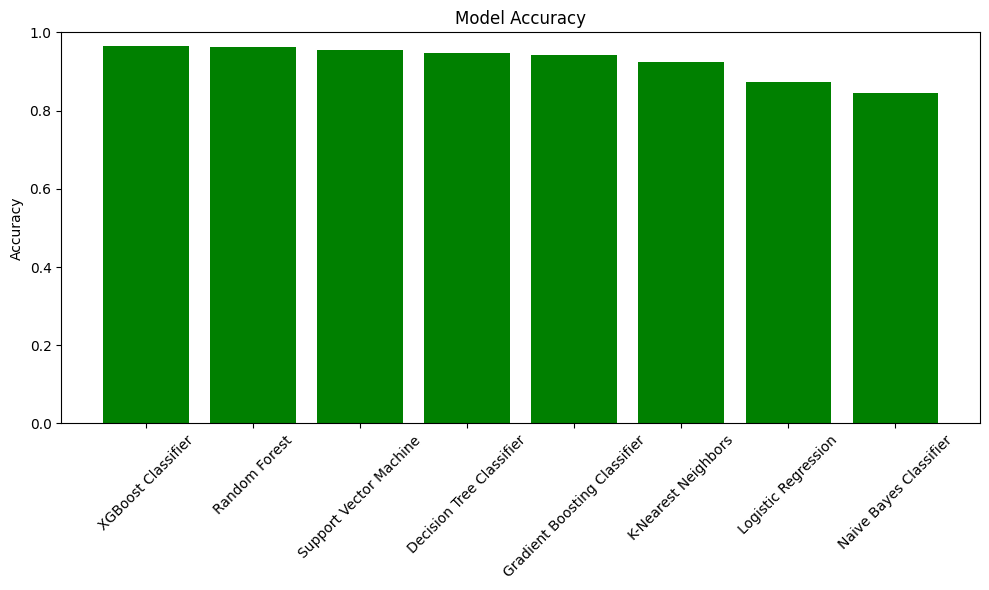

In [45]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df_sorted['Model'], accuracy_df_sorted['Accuracy'], color='green')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Setting limit for y-axis from 0 to 1 for accuracy score
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()